 Use the fourth-order Runge-Kutta method to solve the equation of motion. Plot the angular displacement as a function of time, up to t = 20 s. Use time step ∆t = 0.01 s.

In [1]:
#Importing libraries and making nice plot
import numpy as np                # Importing numpy as np
import matplotlib.pyplot as plt   # Importing matplotlib.pyplot for plotting 
from scipy import integrate       # Importing integrate package from SciPy

#Making a nice plot
%matplotlib inline
newparams = {'figure.figsize': (18, 9), 'axes.grid': False,
             'lines.linewidth': 2,
             'font.size': 25, 'mathtext.fontset': 'stix',
             'font.family': 'STIXGeneral'}
plt.rcParams.update(newparams)

In [2]:
# Parameters
m = 5           # [kg], mass
l = 1.0         # [m], length of pendulum string
g = 9.8         # |m/s^2], gravitational acceleration
theta_0 = 0.2   # [rad], initial angle wrt vertical
w_0 = 0.0       # [rad/s], initial angular velocity  
q = 1         # [m/s], friction parameter
F_D = 0.2         # [N], driving force

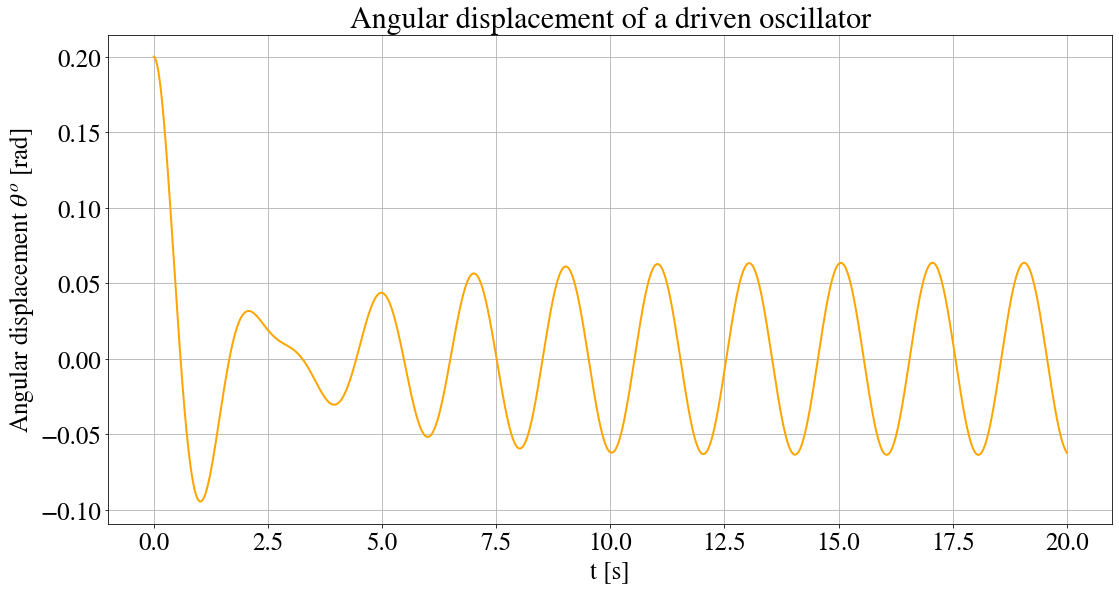

In [3]:
#Making two functions to use for RK4 step
def k(theta, w, t, w_D, q):
    #Right-hand side for driven oscillator
    return F_D*np.sin(w_D*t) - g/l*theta - q*w

def f(w):
    return w

def RK4_step(k, f, theta, w, dt, w_D, q,t):
    #Perform RK4 by step
    k1 = k(theta,w,t,w_D,q)
    f1 = f(w)
    k2 = k(theta + (dt/2)*f1, w + (dt/2)*f1, t + (dt/2), w_D, q)
    f2 = f(w + (dt/2)*k1)
    k3 = k(theta + (dt/2)*f2, w + (dt/2)*f2, t + (dt/2), w_D, q)
    f3 = f(w + (dt/2)*k2)
    k4 = k(theta + dt*f3, w + (dt/2)*f3, t + (dt/2), w_D, q)
    f4 = f(w + dt*k3)
    
    #returning theta and omega array respectively
    return theta + (dt/6)*(f1 + (2*f2) + (2*f3) + f4), w + (dt/6)*(k1 + (2*k2) + (2*k3) + k4)

def RK4_method(k, f, theta0, w0, dt, w_D, q, T):
    #computing theta and omega with runge kutta 4th order
    
    n = int(float(T)/dt) # number of iterations
    theta = np.zeros(n+1)
    w = np.zeros(n+1)
    t = np.linspace(0, T, n + 1)
    theta[0] = theta0
    w[0] = w0
    for i in range(n):
        theta[i+1], w[i+1] = RK4_step(k, f, theta[i], w[i], dt, w_D, q,t[i]) # Calculates values of theta and omega using RK4-method
        
    return theta, w, t

w_D = 3.13       # [rad/s], angular velocity for the drive

dt=0.01 #timestep
theta,w,t = RK4_method(k,f,theta_0,w_0,dt,w_D,q,20)

plt.plot(t,theta, color='orange')
plt.title('Angular displacement of a driven oscillator')
plt.xlabel('t [s]')
plt.ylabel(r'Angular displacement $\theta^o$ [rad]')
plt.grid()
plt.show()

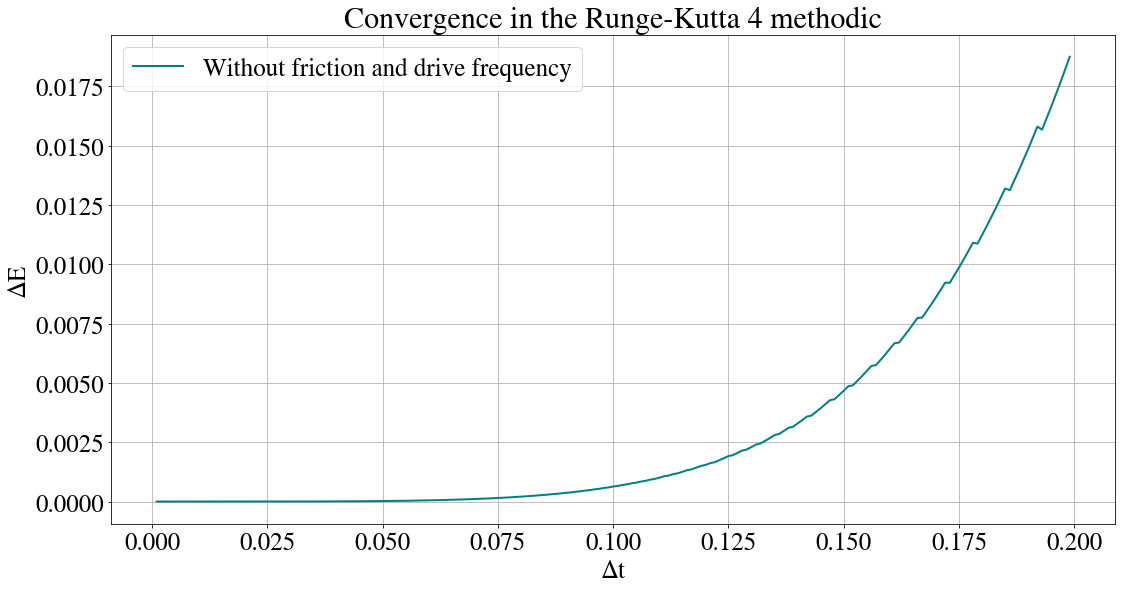

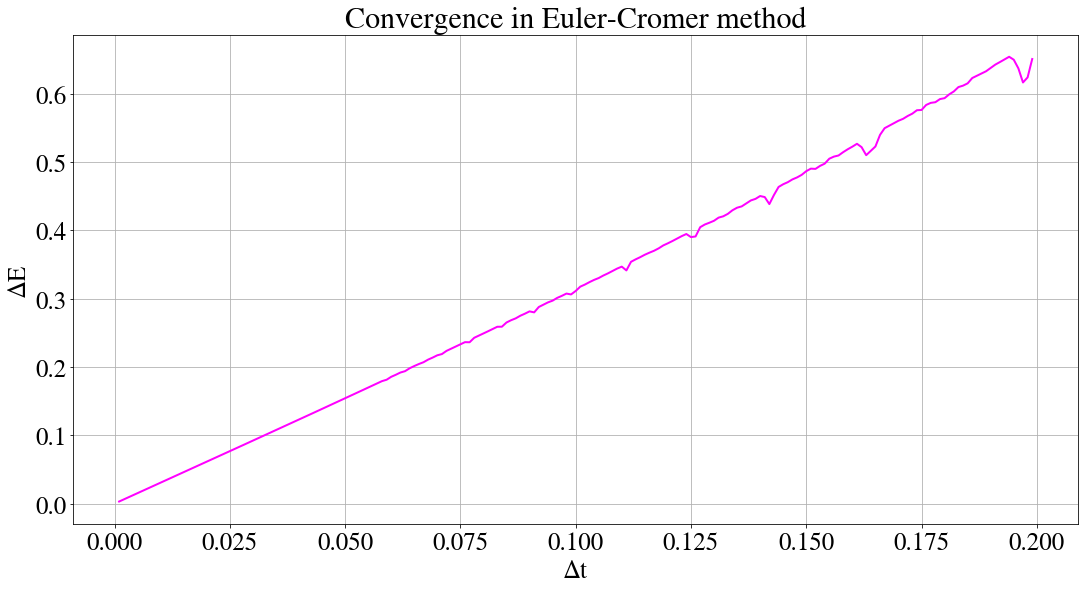

In [4]:
def euler_cromer(theta_0, w_0, dt,w_D,q, T):
    
    n = int(T/dt) #iterations
    
    #Initialize arrays and initial conditions
    theta = np.zeros(n+1)        
    w = np.zeros(n+1)
    t = np.linspace(0, T, n + 1) 
    theta[0] = theta_0           
    w[0] = w_0           
    
    #Euler Cromer
    for i in range(n):           
        w[i+1] = w[i] + (- g/l*theta[i] - q*w[i] + F_D/(m*l)*np.sin(w_D*t[i]))*dt #updated equation of motion
        theta[i+1] = theta[i] + w[i+1]*dt
    
    return theta, w, t

def convergence_test(t_i,t_f,dt):
    vals= np.arange(t_i, t_f, dt)
    dE_RK4 = np.zeros(len(vals)) #for RK4
    dE_EC = np.zeros(len(vals)) #for Euler Cromer
    
    
    #for loop to calculate the differences
    for i in range(len(vals)):
        q=0 #removing friction for comparison 
        w_D=0 #removing drive frequency
        
        theta,w,t=RK4_method(k, f, theta_0, w_0, vals[i], w_D, q, 5)
        E_k = 1/2*m*l**2*w**2 #kinetic energy
        E_p= 1/2*m*g*l*theta**2 #potential energy
        E_tot= E_k + E_p #total energy
        dE_RK4[i] = abs(np.amax(E_tot) - np.amin(E_tot))
        
        theta2,w2,t2=euler_cromer(theta_0, w_0, vals[i], w_D, q, 5)
        E_k2 = 1/2*m*l**2*w2**2 #kinetic energy
        E_p2= 1/2*m*g*l*theta2**2 #potential energy
        E_tot2= E_k2 + E_p2 #total energy
        dE_EC[i] = abs(np.amax(E_tot2) - np.amin(E_tot2))
        
    return vals, dE_RK4, dE_EC

    
t_i=0.001; t_f = 0.2; dt=0.001

dtvals, dE_RK4, dE_EC = convergence_test(t_i,t_f,dt)
    
plt.plot(dtvals, dE_RK4, color='teal', label='Without friction and drive frequency')
plt.title('Convergence in the Runge-Kutta 4 methodic')
plt.xlabel('Δt')
plt.ylabel('ΔE')
plt.grid()
plt.legend()
plt.show()

plt.plot(dtvals, dE_EC, color='fuchsia')
plt.title('Convergence in Euler-Cromer method')
plt.xlabel('Δt')
plt.ylabel('ΔE')
plt.grid()
plt.show()


Comment: The time step 0.01 is sufficient, you can go up to 0.05 on Runge Kutta, but you should stick to 0.01 on Euler Cromer's. Had to remove drive frequency and friction so that the convergence is not completely chaotic. Euler Cromer's behaves quite chaotically, this is because it is first-order convergent and does not work very well on a second-order differential equation. We see that the energy difference increases exponentially on RK4, with far less difference than Euler Cromer, which increases linearly then. The curves are smoother for lower dt values, so I would have gone with a little lower on Euler Cromer, maybe 0.001 possibly. This will be 20 times slower than RK4 if you were to use 0.05 then.

3. Investigate how the resonant amplitude depends on the drive frequency ΩD. Plot the angular response for at least five different values ​​of ΩD, which you think show this relationship.

[0.   1.25 2.5  3.75 5.  ]


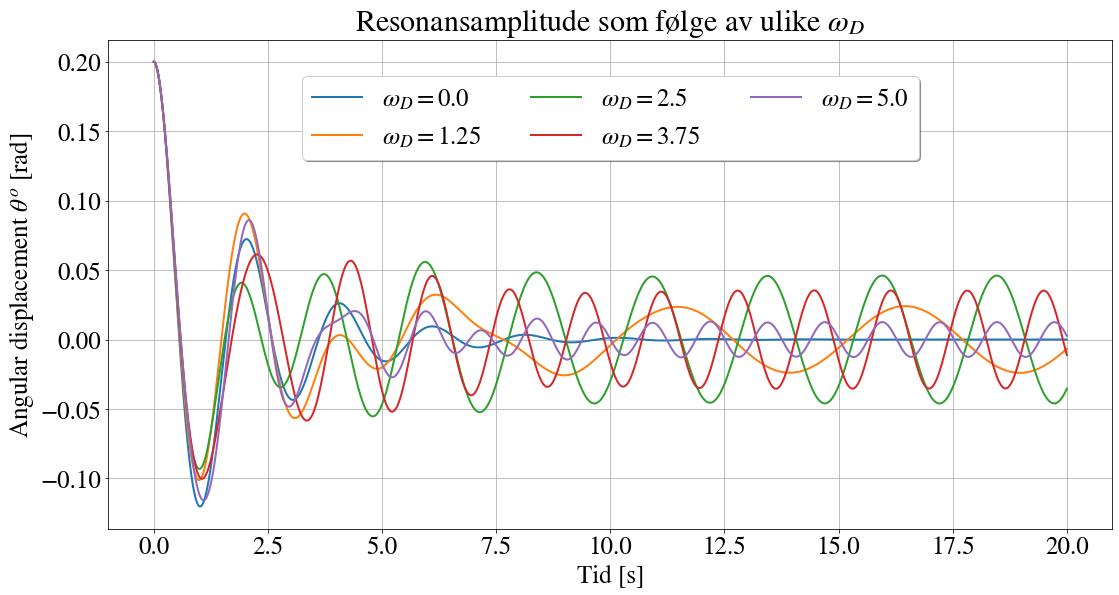

We see that around 1.25 rad/s to 2.5 rad/s the resonance amplitude increases considerably, and then it decreases again


In [5]:
arrayW_d = np.linspace(0,5,5) # 5 difference drive frequencies

print(arrayW_d)

#Investiage the resonant amplitude
for i in arrayW_d:
    theta,w,t = RK4_method(k,f,theta_0,w_0,dt,i,q,20)
    plt.plot(t,theta, label=rf'$\omega_D =${i}')


plt.title(r'Resonant amplitude as a consequence of different $\omega_D$')
plt.xlabel('Tid [s]')
plt.ylabel(r'Angular displacement $\theta^o$ [rad]')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95),
          ncol=3, fancybox=True, shadow=True)
plt.grid()
plt.show()

#Comment
print(r'We see that around 1.25 rad/s to 2.5 rad/s the resonance amplitude increases considerably, and then it decreases again')

The criterion for critical damping is that the pendulum returns as quickly as possible to the equilibrium position without crossing the equilibrium line. We get this for q approximately equal to 5.

4. Investigate how the resonant amplitude depends on the friction parameter, q. Plot
the angular spread for at least five different values ​​of q, which you think shows this relationship.

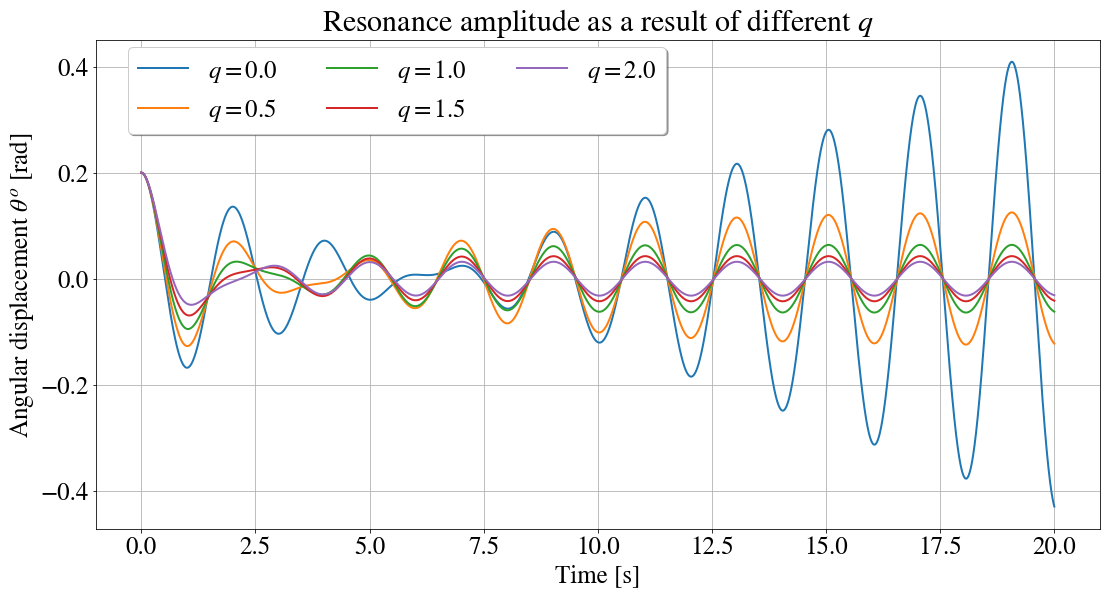

Without any friction damping, the resonance amplitude is enormous, and then it decreases exponentially


In [6]:
array_q = np.linspace(0,2,5) # 5 different drift angular velocities

#Try different friction values
for i in array_q:
    theta,w,t = RK4_method(k,f,theta_0,w_0,dt,w_D,i,20)
    plt.plot(t,theta, label=rf'$q = ${i}')


plt.title(r'Resonance amplitude as a result of different $q$')
plt.xlabel('Time [s]')
plt.ylabel(r'Angular displacement $\theta^o$ [rad]')
plt.legend(loc='upper center', bbox_to_anchor=(0.3, 1.01),
          ncol=3, fancybox=True, shadow=True)
plt.grid()
plt.show()

#Kommentar
print('Without any friction damping, the resonance amplitude is enormous, and then it decreases exponentially')

5. 5. For a damped pendulum without driving force (set FD = 0) we distinguish between supercritical,
subcritical and critical damping. Plot the angular displacement up to t = 4 s, and determine
which q we find these regimes.

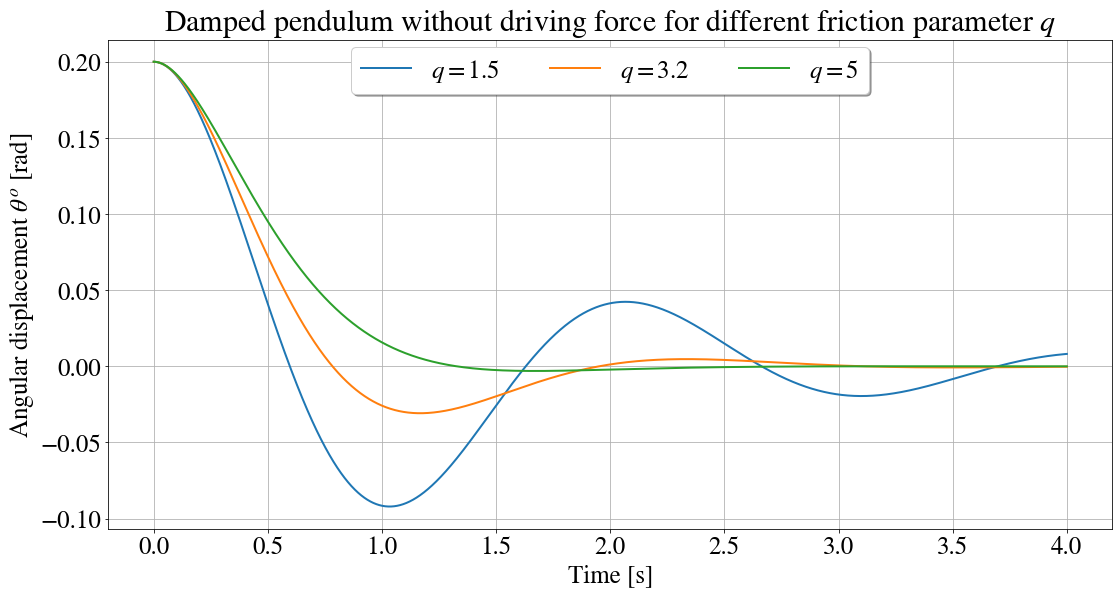

Would probably say for approximately q = 1.5, the system is critically underdamped
q = 3.2 shows a critically damped system
q = 5 will probably be a supercritical damped system, it no longer resembles a simple harmonic motion


In [7]:
F_D = 0 #Redefinition of driving force

q=[1.5,3.2,5] #Checking out different q values

for q in q:
    theta,w,t = RK4_method(k,f,theta_0,w_0,dt,w_D,q,4)
    plt.plot(t,theta, label=rf'$q = ${q}')

plt.title(r'Damped pendulum without driving force for different friction parameter $q$')
plt.xlabel('Time [s]')
plt.ylabel(r'Angular displacement $\theta^o$ [rad]')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.01),
          ncol=3, fancybox=True, shadow=True)
plt.grid()
plt.show()

#Comment
print('Would probably say for approximately q = 1.5, the system is critically underdamped')
print('q = 3.2 shows a critically damped system')
print('q = 5 will probably be a supercritical damped system, it no longer resembles a simple harmonic motion')

Now move away from the assumption that sin θ ≈ θ. Plot the angular displacement as a function of time, i
same plot as the angular response for the small-angle approximation for θ_0 = 60◦ and ω0 = 0.0.
Use time step ∆t = 0.01, and the same parameters as in task 1. Tip: Convert
from degrees to radians with 'np.radians'.
b) Try your hand at the initial values ​​and parameters, and find when chaotic behavior occurs
begins to occur. Plot the angular deflection as a function of time for such chaotic behavior.


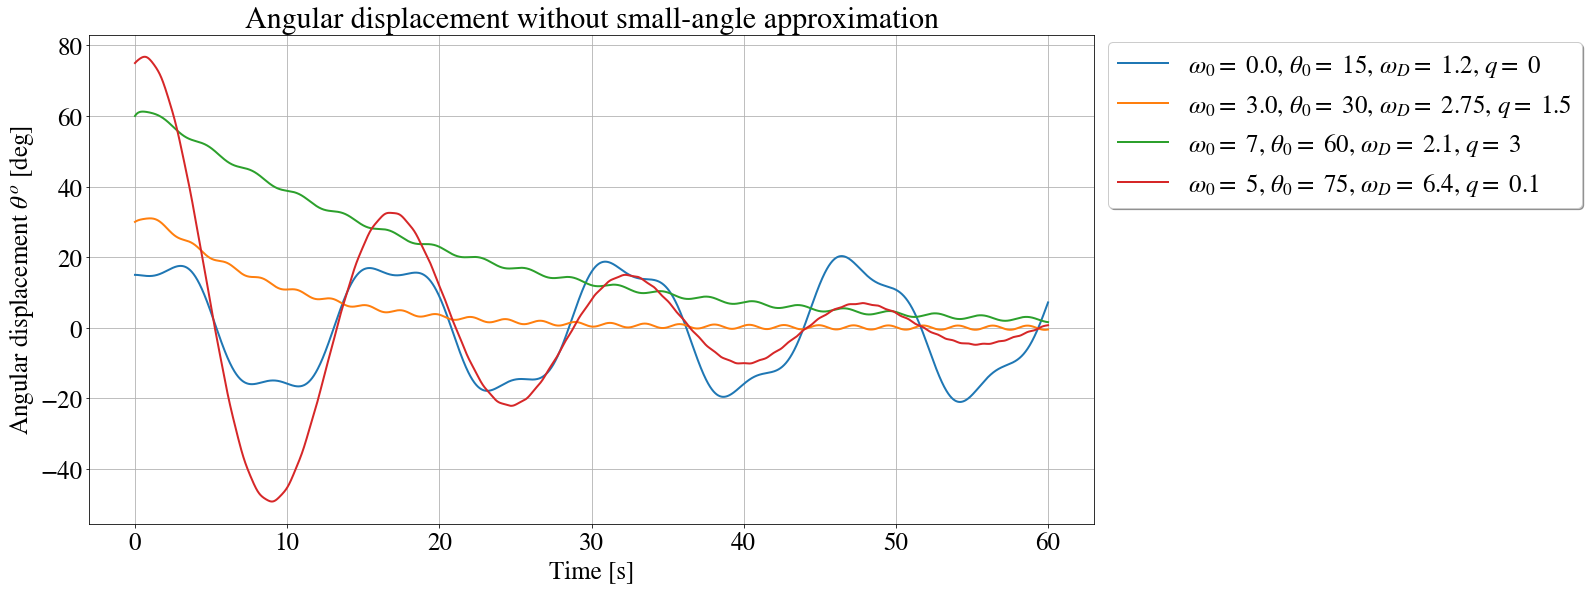

In [8]:
#Making a solution without the small angle approximation
def real(theta,w,t,w_D,q):
    #ekte funksjon
    return F_D*np.sin(w_D*t) - g/l*np.sin(np.radians(theta)) - q*w

F_D = 5
parameters=[[15,30,60,75], #theta_0
           [0.0,3.0,7,5], # w_0
           [1.2,2.75,2.1,6.4], #w_D
           [0,1.5,3,0.1]] #q

for i in range(len(parameters[0])):
    theta_0 = parameters[0][i] 
    w_0 = parameters[1][i] 
    w_D = parameters[2][i] 
    q = parameters[3][i] 
        
    theta_r,w, t = RK4_method(real,f,theta_0,w_0,0.01,w_D,q,60)
    plt.plot(t,theta_r, label=rf'$\omega_0 = $ {w_0}, $\theta_0 = $ {theta_0}, $\omega_D = $ {w_D}, $q = $ {q}')

plt.title(r'Angular displacement without small-angle approximation')
plt.xlabel('Time [s]')
plt.ylabel(r'Angular displacement $\theta^o$ [deg]')
plt.grid()
plt.legend(loc='upper center', bbox_to_anchor=(1.25, 1.01),
          ncol=1, fancybox=True, shadow=True)
plt.show()